# Libraries required

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import seaborn as sns

# The IRIS Dataset

In [ ]:
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's see the data. Print the first 10 examples

In [ ]:
print(iris['data'][45:55])
print([iris['target_names'][x] for x in iris['target'][45:55]])


[[4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']


## Plot in 2D

Take the first two features and create a `scatter` plot.



([], [])

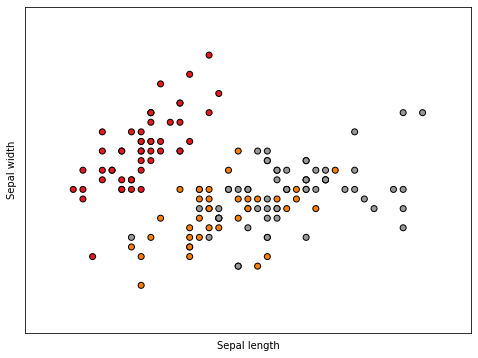

In [ ]:
# we only take the first two features.
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

## Plot in 3D

Apply PCA and take the first 3 dimensions. Create a `scatter` in 3D.

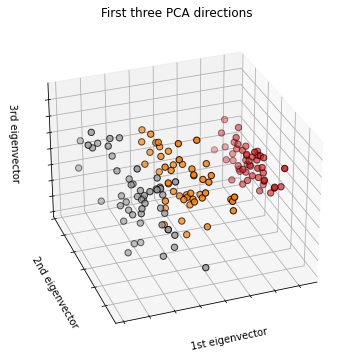

In [ ]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
iris_df = pd.DataFrame({
    "SepalLengthCm": iris['data'][:, 0],
    "SepalWidthCm": iris['data'][:, 1],
    "PetalLengthCm": iris['data'][:, 2],
    "PetalWidthCm": iris['data'][:, 3],
    "Species": iris['target'],
})

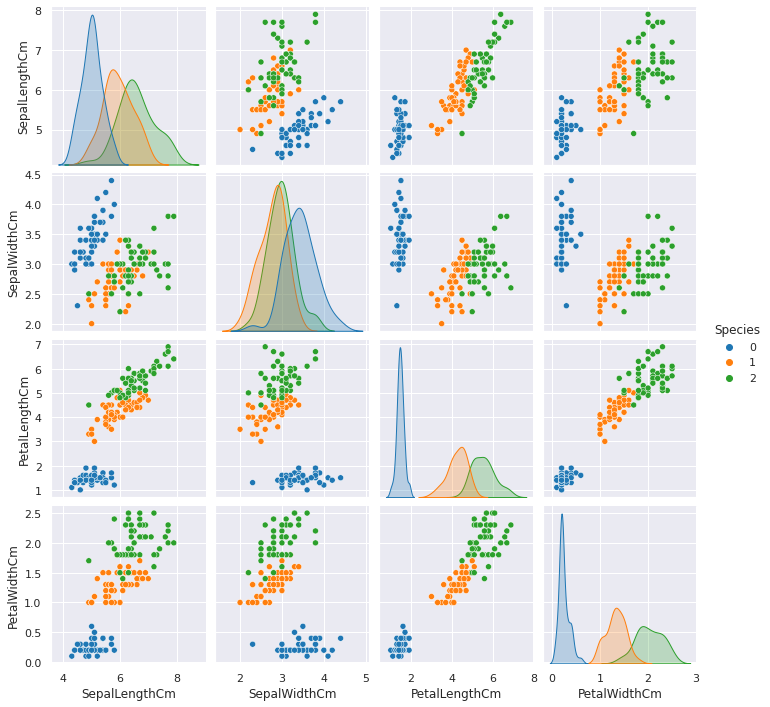

In [ ]:
# Paired plot using seaborn
sns.set()
sns.pairplot(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde", palette="tab10")

More about visualization in Jupyter here:
https://jupyterbook.org/en/stable/interactive/interactive.html

# KNN

KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

1.   Compute the distance between the new data point with every training example.
2.   For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.
3.   Model picks K entries in the training set, the closest to the new data point.
4.   Then it does the majority vote, i.e. the most common class/label among those K entries will be the class of the new data point.

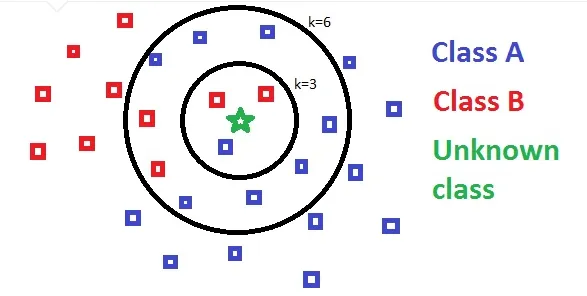

Our task is to build a KNN model which classifies the new species based on the sepal and petal measurements.

In [ ]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

knn_model = KNeighborsClassifier(n_neighbors=3)


scores = cross_val_score(knn_model, iris.data, iris.target, cv=5)
print(scores)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.02


How does this model work? We can inspect the source code using `inspect`

In [ ]:
import inspect
print(inspect.getsource(knn_model.fit))

    def fit(self, X, y):
        """Fit the k-nearest neighbors classifier from the training dataset.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features) or \
                (n_samples, n_samples) if metric='precomputed'
            Training data.

        y : {array-like, sparse matrix} of shape (n_samples,) or \
                (n_samples, n_outputs)
            Target values.

        Returns
        -------
        self : KNeighborsClassifier
            The fitted k-nearest neighbors classifier.
        """
        self._validate_params()

        return self._fit(X, y)



The method calls a private method `_fit`. Let's inspect it.

In [ ]:
print(inspect.getsource(knn_model._fit)) #To see the code inside a method

    def _fit(self, X, y=None):
        if self._get_tags()["requires_y"]:
            if not isinstance(X, (KDTree, BallTree, NeighborsBase)):
                X, y = self._validate_data(
                    X, y, accept_sparse="csr", multi_output=True, order="C"
                )

            if is_classifier(self):
                # Classification targets require a specific format
                if y.ndim == 1 or y.ndim == 2 and y.shape[1] == 1:
                    if y.ndim != 1:
                        warnings.warn(
                            "A column-vector y was passed when a "
                            "1d array was expected. Please change "
                            "the shape of y to (n_samples,), for "
                            "example using ravel().",
                            DataConversionWarning,
                            stacklevel=2,
                        )

                    self.outputs_2d_ = False
                    y = y.reshape((-1, 1))
         

### Let's find the best *k*, i.e. the value of neighbors that maximize the accuracy in classification